# 导入原始数据集

In [1]:
import pandas as pd

file = pd.read_csv('Operate_ID_and_Boarding_Data.csv')
df_data = pd.DataFrame(file)

In [2]:
df_data

,OPERATE_ID,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,20170204000033716076,113.220777,23.147829
1,20170204000033717917,113.376185,22.961079
2,20170204000033717918,113.326963,23.135939
3,20170204000033717984,113.322663,23.117256
4,20170204000033716743,113.247786,23.185061
...,...,...,...
11175133,20170329000044254931,113.290320,23.391121
11175134,20170329000044254935,113.416696,23.132432
11175135,20170329000044256698,113.335566,23.151995
11175136,20170329000044256703,113.296362,23.152669


# 将GPS坐标转换为火星坐标

In [3]:
import math
x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 偏心率平方

def wgs84_to_gcj02(lng, lat):
    """
    WGS84转GCJ02(火星坐标系)
    :param lng:WGS84坐标系的经度
    :param lat:WGS84坐标系的纬度
    :return:
    """
    if out_of_china(lng, lat):  # 判断是否在国内
        return [lng, lat]
    dlat = _transformlat(lng - 105.0, lat - 35.0)
    dlng = _transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [mglng, mglat]


def out_of_china(lng, lat):
    """
    判断是否在国内，不在国内不做偏移
    :param lng:
    :param lat:
    :return:
    """
    return not (lng > 73.66 and lng < 135.05 and lat > 3.86 and lat < 53.55)

def _transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret


def _transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret

lng_lat = []

for i in range(len(df_data.index)):
    lng_lat.append(wgs84_to_gcj02(df_data.GET_ON_LONGITUDE[i], df_data.GET_ON_LATITUDE[i]))
    

In [4]:
lng = []
lat = []

for x in lng_lat:
    lng.append(x[0])
    lat.append(x[1])

In [5]:
df_data['GET_ON_LONGITUDE'] = lng
df_data['GET_ON_LATITUDE'] = lat

In [6]:
df_data

,OPERATE_ID,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,20170204000033716076,113.226116,23.145171
1,20170204000033717917,113.381686,22.958499
2,20170204000033717918,113.332391,23.133354
3,20170204000033717984,113.328081,23.114655
4,20170204000033716743,113.253114,23.182402
...,...,...,...
11175133,20170329000044254931,113.295697,23.388549
11175134,20170329000044254935,113.422214,23.129934
11175135,20170329000044256698,113.341013,23.149433
11175136,20170329000044256703,113.301732,23.150036


In [7]:
# 导出已经进行坐标转换的数据集
# df_data.to_csv('_Operate_ID_and_Boarding_Data.csv')

# file = pd.read_csv('_Operate_ID_and_Boarding_Data.csv')
# df_data = pd.DataFrame(file)

# 数据处理

In [8]:
DATE = []

for i in range(len(df_data.index)):
    DATE.append(df_data.OPERATE_ID[i][:8])
    
df_data['DATE'] = DATE
del df_data['OPERATE_ID']

In [18]:
data_20170201 = df_data[df_data['DATE']=='20170201']

del data_20170201['DATE']
data_20170201 = data_20170201.reset_index(drop = True)

In [19]:
data_20170201

,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,113.341709,23.170732
1,113.341869,23.170696
2,113.268586,23.131016
3,113.343694,23.123688
4,113.315816,23.085144
...,...,...
125121,113.336454,23.136773
125122,113.336055,23.143568
125123,113.234092,23.116359
125124,113.247558,23.125784


In [11]:
with open('city_boundary.txt', 'r') as f:
    city_boundary = f.read()

In [12]:
city_boundary

'113.203717,23.121872;113.209714,23.121848;113.210547,23.12337;113.211605,23.128883;113.212463,23.136315;113.212671,23.141104;113.211432,23.141658;113.21171,23.143438;113.211691,23.143509;113.210986,23.143341;113.209957,23.143156;113.208934,23.143238;113.208934,23.144074;113.208214,23.144074;113.208202,23.144388;113.204973,23.143865;113.204962,23.144306;113.201419,23.144469;113.201082,23.146107;113.19884,23.146083;113.197168,23.146176;113.194428,23.146887;113.194484,23.145363;113.194182,23.145352;113.194182,23.146002;113.193578,23.145805;113.192777,23.144922;113.192196,23.144922;113.191511,23.145328;113.191267,23.144887;113.189641,23.144794;113.188549,23.145096;113.188305,23.145561;113.188407,23.146553;113.187939,23.146636;113.187724,23.147361;113.188781,23.148139;113.18834,23.148465;113.187515,23.149603;113.188021,23.151619;113.187746,23.152446;113.187443,23.152363;113.187168,23.152693;113.186748,23.152588;113.186423,23.15289;113.186283,23.153081;113.186246,23.153564;113.185883,23.153

In [13]:
city_boundary = city_boundary.split(';')

In [14]:
city_boundary

['113.203717,23.121872',
 '113.209714,23.121848',
 '113.210547,23.12337',
 '113.211605,23.128883',
 '113.212463,23.136315',
 '113.212671,23.141104',
 '113.211432,23.141658',
 '113.21171,23.143438',
 '113.211691,23.143509',
 '113.210986,23.143341',
 '113.209957,23.143156',
 '113.208934,23.143238',
 '113.208934,23.144074',
 '113.208214,23.144074',
 '113.208202,23.144388',
 '113.204973,23.143865',
 '113.204962,23.144306',
 '113.201419,23.144469',
 '113.201082,23.146107',
 '113.19884,23.146083',
 '113.197168,23.146176',
 '113.194428,23.146887',
 '113.194484,23.145363',
 '113.194182,23.145352',
 '113.194182,23.146002',
 '113.193578,23.145805',
 '113.192777,23.144922',
 '113.192196,23.144922',
 '113.191511,23.145328',
 '113.191267,23.144887',
 '113.189641,23.144794',
 '113.188549,23.145096',
 '113.188305,23.145561',
 '113.188407,23.146553',
 '113.187939,23.146636',
 '113.187724,23.147361',
 '113.188781,23.148139',
 '113.18834,23.148465',
 '113.187515,23.149603',
 '113.188021,23.151619',
 '11

In [15]:
city_boundary_lng = []
city_boundary_lat = []
for x in city_boundary:
    city_boundary_lng.append(float(x.split(',')[0]))
    city_boundary_lat.append(float(x.split(',')[1]))

In [20]:
import operator
import pandas as pd
#nvert:多边形的顶点个数，vertx:多边形顶点的x值的列表，verty:多边形顶点的y值的列表，（testx,testy）：检测点坐标
def pnpoly(testx,testy,nvert=len(city_boundary),vertx=city_boundary_lng,verty=city_boundary_lat):
    c=0
    for i in range(0,nvert):
        if i==0:
            j=nvert-1
        else:
            j=i-1
        if operator.ne(operator.gt(verty[i],testy),operator.gt(verty[j],testy)) and operator.lt(testx,(vertx[j]-vertx[i]) * (testy-verty[i]) / (verty[j]-verty[i]) + vertx[i]):
            c=1-c  #点在多变形内
   
    return c

PNPOLY=[]

for i in range(len(data_20170201.index)):
    PNPOLY.append(pnpoly(testx=data_20170201.GET_ON_LONGITUDE[i], testy=data_20170201.GET_ON_LATITUDE[i]))
    
data_20170201['PNPOLY'] = PNPOLY
data_20170201 = data_20170201[-data_20170201.PNPOLY.isin([0])]
del data_20170201['PNPOLY']
data_20170201 = data_20170201.reset_index(drop = True)

In [21]:
data_20170201

,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,113.341709,23.170732
1,113.341869,23.170696
2,113.268586,23.131016
3,113.343694,23.123688
4,113.315816,23.085144
...,...,...
121806,113.336454,23.136773
121807,113.336055,23.143568
121808,113.234092,23.116359
121809,113.247558,23.125784


In [22]:
data_20170201.to_csv('data_20170201.csv')

---

In [1]:
import pandas as pd

file = pd.read_csv('data_20170201.csv')
data_20170201 = pd.DataFrame(file)

In [3]:
del data_20170201['Unnamed: 0']

In [4]:
data_20170201

,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,113.341709,23.170732
1,113.341869,23.170696
2,113.268586,23.131016
3,113.343694,23.123688
4,113.315816,23.085144
...,...,...
121806,113.336454,23.136773
121807,113.336055,23.143568
121808,113.234092,23.116359
121809,113.247558,23.125784


# KMeans

In [26]:
K_data_20170201 = data_20170201.copy(deep=True)
list_K_data_20170201 = list(K_data_20170201.values)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(list_K_data_20170201)

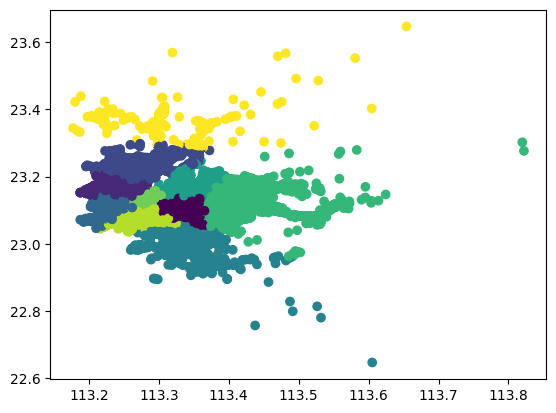

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_K_data_20170201)[:, 0], np.array(list_K_data_20170201)[:, 1], c=kmeans.labels_)
plt.show()

In [30]:
K_data_20170201['LABEL'] = kmeans.labels_

In [31]:
CLUSTER_CENTER = []

for i in K_data_20170201.LABEL:
    CLUSTER_CENTER.append(kmeans.cluster_centers_[i])

In [32]:
K_data_20170201['CLUSTER_CENTER'] = CLUSTER_CENTER

In [33]:
from geopy.distance import geodesic

DISTANCE = []

for i in range(len(K_data_20170201.index)):
    DISTANCE.append(geodesic((K_data_20170201.CLUSTER_CENTER[i][1], K_data_20170201.CLUSTER_CENTER[i][0]), (K_data_20170201.GET_ON_LATITUDE[i], K_data_20170201.GET_ON_LONGITUDE[i])))

In [38]:
K_data_20170201['DISTANCE'] = [float(str(x).strip('km'))*1000 for x in DISTANCE]

In [39]:
K_data_20170201

,GET_ON_LONGITUDE,GET_ON_LATITUDE,LABEL,CLUSTER_CENTER,DISTANCE
0,113.341709,23.170732,5,"[113.3316650260466, 23.160334897411527]",1543.872726
1,113.341869,23.170696,5,"[113.3316650260466, 23.160334897411527]",1551.930264
2,113.268586,23.131016,7,"[113.27771294243537, 23.12874246477332]",968.105833
3,113.343694,23.123688,0,"[113.32632037679967, 23.119338359638466]",1843.603984
4,113.315816,23.085144,0,"[113.32632037679967, 23.119338359638466]",3936.792724
...,...,...,...,...,...
121806,113.336454,23.136773,0,"[113.32632037679967, 23.119338359638466]",2192.097466
121807,113.336055,23.143568,5,"[113.3316650260466, 23.160334897411527]",1910.546010
121808,113.234092,23.116359,3,"[113.24243826330414, 23.115203855021377]",864.452890
121809,113.247558,23.125784,3,"[113.24243826330414, 23.115203855021377]",1283.740813


In [40]:
center_radius = {}

for i in range(len(K_data_20170201.index)):
    center_radius.setdefault(str(list(K_data_20170201.CLUSTER_CENTER[i])).strip('['']'), K_data_20170201.DISTANCE[i])
    if K_data_20170201.DISTANCE[i] > center_radius[str(list(K_data_20170201.CLUSTER_CENTER[i])).strip('['']')]:
        center_radius[str(list(K_data_20170201.CLUSTER_CENTER[i])).strip('['']')] = K_data_20170201.DISTANCE[i]

In [54]:
str(list(K_data_20170201.CLUSTER_CENTER[0]))

'[113.3316650260466, 23.160334897411527]'

In [55]:
K_data_20170201_CLUSTER_CENTER = []
for i in range(len(K_data_20170201.index)):
    K_data_20170201_CLUSTER_CENTER.append(str(list(K_data_20170201.CLUSTER_CENTER[i])).strip('['']'))

In [56]:
K_data_20170201_CLUSTER_CENTER

['113.3316650260466, 23.160334897411527',
 '113.3316650260466, 23.160334897411527',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.32632037679967, 23.119338359638466',
 '113.27771294243537, 23.12874246477332',
 '113.40342422593096, 23.12242609466284',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.3073886667884, 22.997449104387776',
 '113.27475556957349, 23.214085149782292',
 '113.27771294243537, 23.12874246477332',
 '113.27471769818453, 23.09084128852986',
 '113.24243826330414, 23.115203855021377',
 '113.3316650260466, 23.160334897411527',
 '113.24243826330414, 23.115203855021377',
 '113.27471769818453, 23.09084128852986',
 '113.27771294243537, 23.12874246477332',
 '113.27475556957349, 23.214085149782292',
 '113.27771294243537, 23.12874246477332',
 '113.27771294243537, 23.12874246477332',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.24243826330414, 23.1

In [57]:
level = {}

for x in K_data_20170201_CLUSTER_CENTER:
    level.setdefault(str(x).strip('[array([''])]'), 0)
    level[str(x).strip('[array([''])]')] += 1

In [58]:
level = sorted(level.items(), key=lambda item:item[1], reverse=True)

In [69]:
level = dict(level)

In [61]:
from pandas.core.frame import DataFrame

center_radius_level = DataFrame(list(center_radius.keys()), columns = ['CENTER'])

In [66]:
center_radius_level

,CENTER,RADIUS
0,"113.3316650260466, 23.160334897411527",9997.410944
1,"113.27771294243537, 23.12874246477332",3813.580231
2,"113.32632037679967, 23.119338359638466",8192.258090
3,"113.40342422593096, 23.12242609466284",47051.727739
4,"113.3073886667884, 22.997449104387776",49439.943182
5,"113.27475556957349, 23.214085149782292",12259.018420
6,"113.27471769818453, 23.09084128852986",7871.916017
7,"113.24243826330414, 23.115203855021377",8268.278700
8,"113.25019684735764, 23.15966702331781",6455.396812
9,"113.30675742801289, 23.380715552356858",46153.335251


In [65]:
center_radius_level['RADIUS'] = list(center_radius.values())

In [70]:
i = 1
for x in list(level.keys()):
    center_radius_level.loc[center_radius_level['CENTER'] == x, 'LEVEL'] = i
    i+=1

In [71]:
center_radius_level

,CENTER,RADIUS,LEVEL
0,"113.3316650260466, 23.160334897411527",9997.410944,6.0
1,"113.27771294243537, 23.12874246477332",3813.580231,1.0
2,"113.32632037679967, 23.119338359638466",8192.258090,2.0
3,"113.40342422593096, 23.12242609466284",47051.727739,7.0
4,"113.3073886667884, 22.997449104387776",49439.943182,9.0
5,"113.27475556957349, 23.214085149782292",12259.018420,8.0
6,"113.27471769818453, 23.09084128852986",7871.916017,4.0
7,"113.24243826330414, 23.115203855021377",8268.278700,3.0
8,"113.25019684735764, 23.15966702331781",6455.396812,5.0
9,"113.30675742801289, 23.380715552356858",46153.335251,10.0


In [72]:
center_radius_level.to_csv('center_radius_level_0201.csv')

In [79]:
from pandas.core.frame import DataFrame

passenger_hot_spot = DataFrame(list(center_radius.keys()), columns = ['CENTER'])

In [80]:
passenger_hot_spot.to_csv('passenger_hot_spot_0201.csv')

# DBSCAN

In [84]:
D_data_20170201 = data_20170201.copy(deep=True)
list_D_data_20170201 = list(D_data_20170201.values)

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.011).fit(list_D_data_20170201)

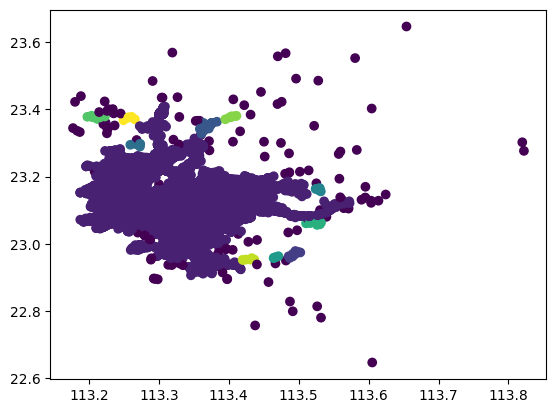

In [197]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_D_data_20170201)[:, 0], np.array(list_D_data_20170201)[:, 1], c=dbscan.labels_)
plt.show()

# Birch

In [84]:
B_data_20170201 = data_20170201.copy(deep=True)
list_B_data_20170201 = list(B_data_20170201.values)

In [ ]:
from sklearn.cluster import Birch

birch = Birch(eps=0.011).fit(list_D_data_20170201)